In [12]:
import numpy as np
import PIL as pil

import urllib.request
# import cv2 as cv

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image
from skimage.color import rgb2hsv
import os


#### Local Import

In [225]:
## 3 different file versions
im = pil.Image.open('../data/lunar_craters_01.png')
il = im.load()

##Crop to symmetric
area = (0, 0, 512, 512)
im = im.crop(area)

image_array = np.array(im)

#### Web Import

In [226]:
r_link = 'https://upload.wikimedia.org/wikipedia/commons/d/dc/Conical_mound_in_trough_on_Mars%27_north_pole.jpg'
urllib.request.urlretrieve(r_link, "../data/crater_wiki_01.jpg")


('../data/crater_wiki_01.jpg', <http.client.HTTPMessage at 0x7f113f6d4b50>)

### Image Transformations

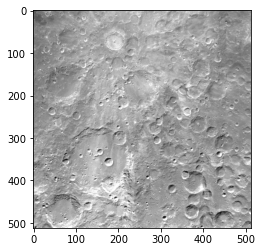

In [228]:
imshow(im)

#### Base Version

In [229]:
## Remove Alpha layer
image_array.shape
im3 = image_array[:,:,:3]
im3.shape

(512, 512, 3)

In [230]:
##Combine x/y dim for kmean algo
vectorized = np.float32(im3.reshape((-1,3)))
vectorized.shape

(262144, 3)

In [231]:
kmeans = KMeans(random_state=0, init='random', n_clusters=8)
labels = kmeans.fit_predict(vectorized)


In [232]:
##Reshape output into xy
pic = labels.reshape(512, 512)

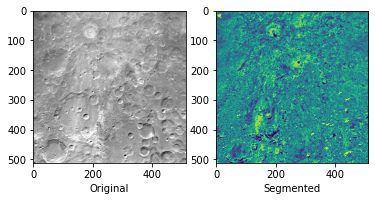

In [233]:
f, axarr = plt.subplots(1, 2)
axarr[0].set_xlabel('Original')
axarr[1].set_xlabel('Segmented')
axarr[0].imshow(im3)
axarr[1].imshow(pic)

plt.savefig('../data/lunar_craters_01_kmeans.png')

In [244]:
def full_image_process(path, out):
    ##Load image
    im = pil.Image.open(path)
    
    ##Crop to symmetric
    area = (0, 0, 512, 512)
    im = im.crop(area)
    image_array = np.array(im)
    
    ##Remove extra dimensions
    im3 = image_array[:,:,:3]
    
    ##Combine x/y dim for kmean algo
    vectorized = np.float32(im3.reshape((-1,3)))
    vectorized.shape    
    
    ##Apply Kmeans
    kmeans = KMeans(random_state=0, init='random', n_clusters=8)
    labels = kmeans.fit_predict(vectorized)

    ##Revert x/y dim
    pic = labels.reshape(512, 512)
    
    f, axarr = plt.subplots(1, 2)
    axarr[0].set_xlabel('Original')
    axarr[1].set_xlabel('Segmented')
    axarr[0].imshow(im3)
    axarr[1].imshow(pic)

    plt.savefig(out)
    

## Kmeans Module:

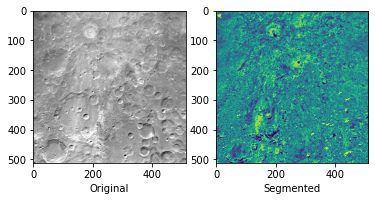

In [245]:
p = '../data/lunar_craters_01.png'
o = '../data/lunar_craters_01_kmeans.png'
full_image_process(p, o)

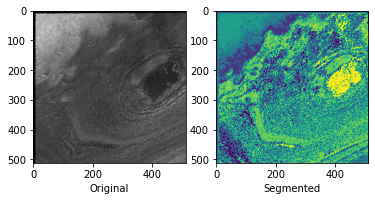

In [247]:
p = '../data/crater_wiki_01.jpg'
o = '../data/crater_wiki_01_kmeans.png'
full_image_process(p, o)

#### High Dim version

In [235]:
z = np.dstack(im3, rgb2hsv(im3))
print(z.shape)

TypeError: _dstack_dispatcher() takes 1 positional argument but 2 were given

In [236]:
vectorized = np.float32(z.reshape((-1,6)))
vectorized.shape

(262144, 6)

In [237]:
kmeans = KMeans(random_state=0, init='random', n_clusters=8)
labels = kmeans.fit_predict(vectorized)

In [239]:
f, axarr = plt.subplots(1, 2, figsize=(15, 15))
axarr[0].set_xlabel('Original')
axarr[1].set_xlabel('Segmented')
axarr[0].imshow(z)
axarr[1].imshow(pic)


### Performance Comparison

In [ ]:
'''
Watershed segmentation
User defined markers
'''

